## Display A Scatter Plot to the Pixel Board
### display_scatter_plot_to_pixelboard.ipynb

### PIXEL BOARD Block

![pc](pixel_coordinates.png)

### Coordinate Transformation Block 

In [1]:
# Specifying the origin and size of the pixel peg board

num_pixels = 100   # 10x10 Matrix
side = 10
scale = 1
xoff = 0
yoff = side-1

# Default Origin is top-left of pixel peg board
rpx = 0  # top-left with +col going right
cpx = 0  # top-left with +row going down

def origin(loc):
    global rpx
    global cpx
    if  loc == 'tl':     # top-left
        rpx = 0              # top-left with +row going down
        cpx = 0              # top-left with +col going right
    elif  loc == 'bl':   # bot-left
        rpx = side-1       # bot-left with +row going up
        cpx = 0            # bot-left with +col going right
    elif  loc == 'tr':   # top-right
        rpx = 0            # top-right with +row going down
        cpx = side-1       # top-right with +col going left
    elif  loc == 'br':   # bot-right
        rpx = side-1       # bot-right with +row going up
        cpx = side-1       # bot-right with +col going left        
    else:                # default top-left
        rpx = 0            # top-left with +row going down
        cpx = 0            # top-left with +col going right   

In [2]:
# Creating pixel conversion 2-D Array 10x10
import math
import numpy as np

P = np.array([[90,91,92,93,94,95,96,97,98,99], 
              [89,88,87,86,85,84,83,82,81,80],
              [70,71,72,73,74,75,76,77,78,79], 
              [69,68,67,66,65,64,63,62,61,60],
              [50,51,52,53,54,55,56,57,58,59], 
              [49,48,47,46,45,44,43,42,41,40],
              [30,31,32,33,34,35,36,37,38,39], 
              [29,28,27,26,25,24,23,22,21,20],
              [10,11,12,13,14,15,16,17,18,19], 
              [ 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])  

def xypix(x,y):
    res = 0
    c = int(np.abs(scale*(x+xoff)))
    r = int(np.abs(scale*(y-yoff)))    
    #print(f'r = {r} c = {c}')
    if r<side and r>=0 and c<side and c>=0:
        res = P[r][c]
    return res

### Import Libraries Block

In [3]:
#### IMPORT LIBRARIES Code Block
import board
import neopixel
from time import sleep
from sys import exit

### Neopixel Setup Block

In [4]:
#### Neopixel Setup Block
pixel_pin = board.D18
ORDER = neopixel.RGB
pixels = neopixel.NeoPixel(pixel_pin, num_pixels, 
                           brightness=0.1, auto_write=False,
                           pixel_order=ORDER)

### Python Functions Block 

In [5]:
def reset():       # simply set leds off
    for ii in range(num_pixels):
        #pixels.fill((0,0,0))
        pixels[ii]=((0,0,0))
    pixels.show()
    sleep(0.1)

In [6]:
def initialize():   # set leds white-off
    for ii in range(3):         # flash white 3-times
        pixels.fill((0,0,0))
        #print(pixels)
        pixels.show()
        sleep(0.1)
        pixels.fill((255,255,255))
        #print(pixels)
        pixels.show()
        sleep(0.1)
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()    

In [7]:
def allcolors():    # set leds red-green-blue-yellow-magenta-cyan
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((255,0,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,255,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,0,255))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((255,255,0))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((255,0,255))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,255,255))
    #print(pixels)
    pixels.show()
    sleep(1)
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()
    sleep(1)

In [8]:
def finish():
    for ii in range(3):         # flash cyan 3-times
        pixels.fill((0,0,0))
        #print(pixels)
        pixels.show()
        sleep(0.1)
        pixels.fill((0,255,255))
        #print(pixels)
        pixels.show()
        sleep(0.1)    
    pixels.fill((0,0,0))
    #print(pixels)
    pixels.show()        

In [9]:
def travel():
    for ii in range(3):             # start 3-white flashes in first pixel then turn it green
        pixels[0]=((0,0,0))
        pixels.show()
        sleep(0.1)
        pixels[0]=((255,255,255))
        pixels.show()
        sleep(0.1)
    pixels[0]=((0,255,0))
    pixels.show()
    sleep(0.1)

    for ii in range(num_pixels):    # running cyan through entire strip
        if ii > 1:                  # turn off previous - turn on current to red
            pixels[ii-1]=((0,0,0))
            pixels[ii]=((255,0,0))
        if ii > int(num_pixels/2):  # Turn middle pixel only green 
            pixels[int(num_pixels/2)]=((0,255,0)) 
        pixels.show()
        sleep(0.1)    

    for ii in range(3):             # end 3-magenta flashes in last pixel then green
        pixels[num_pixels-1]=((0,0,0))
        pixels.show()
        sleep(0.1)        
        pixels[num_pixels-1]=((255,0,255))
        pixels.show()
        sleep(0.1)
        
    pixels[num_pixels-1]=((0,255,0))
    pixels.show()
    sleep(1)    
    pixels.fill((0,0,0))
    pixels.show()
    sleep(0.1)     

In [10]:
def fill_matrix(c):
    for row in range(0,side):
        for col in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
        pixels.show()
        sleep(0.2)

In [11]:
def move_col(c):
    for col in range(0,side):
        for row in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if col > 0:
                pixn = pix10(row,col-1)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)    
    reset()
    for col in range(side-1,-1,-1):
        for row in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if col < side-1:
                pixn = pix10(row,col+1)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)
    reset()

In [12]:
def move_row(c):
    for row in range(0,side):
        for col in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if row > 0:
                pixn = pix10(row-1,col)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)    
    reset()
    for row in range(side-1,-1,-1):
        for col in range(0,side):
            pixn = pix10(row,col)
            pixels[pixn] = ((c[0],c[1],c[2]))
            if row < side-1:
                pixn = pix10(row+1,col)
                pixels[pixn] = ((0,0,0))
        pixels.show()
        sleep(0.2)
    reset()

### MATPLOTLIB Setup Block 

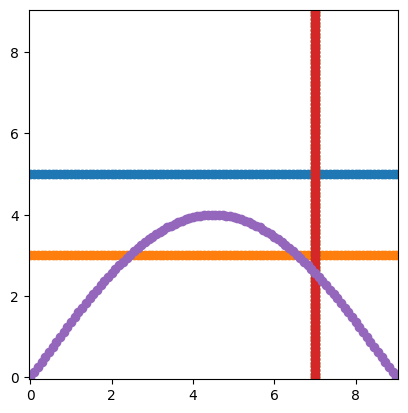

In [13]:
# Setup MATPLOTLIB PLOTS
import random,math,time
import matplotlib.pyplot as plt

# setup plot
start_time = time.time()
fig, axs = plt.subplots(1)
plt.margins(0.005, tight=True)
axs.set_aspect(1)
xv = np.linspace(0, side-1, num_pixels)
yv = np.linspace(0, side-1, num_pixels)
axs.plot(xv,yv, linestyle="None")

# hoiz line
xv1 = xv
yv1 = np.repeat(5, num_pixels)
axs.scatter(xv,yv1)

# hoiz line
xv2 = xv
yv2 = np.repeat(3, num_pixels)
axs.scatter(xv2,yv2)

# vert line
xv3 = np.repeat(7, num_pixels)
yv3 = np.linspace(0, side-1, num_pixels)
axs.scatter(xv3,yv3)

# vert line
xv3 = np.repeat(7, num_pixels)
yv3 = np.linspace(0, side-1, num_pixels)
axs.scatter(xv3,yv3)

# A sine curve
theta = np.linspace(0, np.pi, num_pixels)
radius = 4
xv4 = np.linspace(0, side-1, num_pixels)
yv4 = radius * np.sin(theta)
axs.scatter(xv4,yv4)

### Display Plot to Pixel Board

In [14]:
def plot_to_pixel(X,Y,C):
    for ii in np.arange(0,num_pixels):
        pixn = xypix(X[ii],Y[ii])
        #print(f'X = {X[ii]} ,Y = {X[ii]}, pixn = {pixn}')
        pixels[pixn] = (C[0],C[1],C[2])    

In [15]:
def plot_to_pixel_animate(X,Y,C,T):
    for ii in np.arange(0,num_pixels):
        pixn = xypix(X[ii],Y[ii])
        #print(f'X = {X[ii]} ,Y = {X[ii]}, pixn = {pixn}')
        pixels[pixn] = (C[0],C[1],C[2])
        pixels.show()
        sleep(T)

In [16]:
#### MAIN LOOP Code Block
origin('tl')     # Set origin to top-left of pixel board
reset()
initialize()

clr = ((255,0,255))
plot_to_pixel(xv1,yv1,clr)

clr = ((0,0,255))
plot_to_pixel(xv2,yv2,clr)

clr = ((0,255,255))
plot_to_pixel_animate(xv3,yv3,clr,0.01)

clr = ((255,0,0))
plot_to_pixel_animate(xv4,yv4,clr,0.01)

#allcolors()
#travel()


In [17]:
pixels.show()
sleep(0.2)